In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt  

In [6]:
def RetrieveFile(filename):
    df = pd.read_csv('../datasets/'+filename+'.csv',sep=";")
    return df

In [13]:
link = RetrieveFile('link')
link = link.rename({"Site":"src_site","Code":"src_code","URL":"src_url","Nb photos total":"src_img","Site.1":"comp_site","Code.1":"comp_code","URL.1":"comp_url","Nb photos identiques":"comp_img","% correspondance":"%corresp"},axis=1)
link

,src_site,src_code,src_url,src_img,comp_site,comp_code,comp_url,comp_img,%corresp
0,Booking,4821485,/hotel/fr/stylish-3-bedroom-apartment-with-gar...,24,Abritel,731.1814142.1989715,/location-vacances/p1814142?uni_id=1989715&adu...,14,58%
1,Booking,6386215,/hotel/fr/cmg-tour-eiffel-xxiv.fr.html?aid=304...,7,Abritel,121.4880461.5913865,/location-vacances/p4880461a?uni_id=5913865,5,71%
2,Booking,6386215,/hotel/fr/cmg-tour-eiffel-xxiv.fr.html?aid=304...,7,Abritel,121.4880461.5913853,/location-vacances/p4880461a?uni_id=5913853,5,71%
3,Booking,4762284,/hotel/fr/grand-studio-sur-jardin-interieur-pa...,7,Abritel,731.1762809.1938298,/location-vacances/p1762809?uni_id=1938298&adu...,5,71%
4,Booking,6676386,/hotel/fr/cmg-sezz-11.fr.html?aid=304142;sid=8...,8,Abritel,121.4880461.5913865,/location-vacances/p4880461a?uni_id=5913865,6,75%
...,...,...,...,...,...,...,...,...,...
39954,Abritel,731.1933294.2109074,/location-vacances/p1933294?uni_id=2109074&adu...,10,Airbnb,43417690,https://www.airbnb.fr/rooms/43417690,9,90%
39955,Abritel,731.1940813.2116643,/location-vacances/p1940813?uni_id=2116643&adu...,8,Abritel,731.1940856.2116686,/location-vacances/p1940856?uni_id=2116686&adu...,7,88%
39956,Abritel,731.1804863.1980422,/location-vacances/p1804863?uni_id=1980422&adu...,31,Airbnb,35605343,https://www.airbnb.fr/rooms/35605343,28,90%
39957,Abritel,731.1940856.2116686,/location-vacances/p1940856?uni_id=2116686&adu...,7,Abritel,731.1940813.2116643,/location-vacances/p1940813?uni_id=2116643&adu...,6,86%


In [19]:
airbnb = link[link.src_site == "Airbnb"]

,src_site,src_code,src_url,src_img,comp_site,comp_code,comp_url,comp_img,%corresp
6,Airbnb,23944567,https://www.airbnb.fr/rooms/23944567,13,Airbnb,25241649,https://www.airbnb.fr/rooms/25241649,12,92%
7,Airbnb,24879560,https://www.airbnb.fr/rooms/24879560,12,Airbnb,25992746,https://www.airbnb.fr/rooms/25992746,8,67%
8,Airbnb,25992746,https://www.airbnb.fr/rooms/25992746,8,Airbnb,24879560,https://www.airbnb.fr/rooms/24879560,7,88%
9,Airbnb,34214818,https://www.airbnb.fr/rooms/34214818,12,Airbnb,1132120,https://www.airbnb.fr/rooms/1132120,11,92%
10,Airbnb,34439811,https://www.airbnb.fr/rooms/34439811,16,Airbnb,28665866,https://www.airbnb.fr/rooms/28665866,13,81%
...,...,...,...,...,...,...,...,...,...
39946,Airbnb,44480828,https://www.airbnb.fr/rooms/44480828,25,Airbnb,44482206,https://www.airbnb.fr/rooms/44482206,25,100%
39947,Airbnb,44482206,https://www.airbnb.fr/rooms/44482206,25,Airbnb,44480828,https://www.airbnb.fr/rooms/44480828,25,100%
39948,Airbnb,44597191,https://www.airbnb.fr/rooms/44597191,90,Airbnb,38146197,https://www.airbnb.fr/rooms/38146197,76,84%
39949,Airbnb,45306982,https://www.airbnb.fr/rooms/45306982,39,Airbnb,22080242,https://www.airbnb.fr/rooms/22080242,39,100%


In [20]:
link[link.src_site == "Abritel"]

,src_site,src_code,src_url,src_img,comp_site,comp_code,comp_url,comp_img,%corresp
38,Abritel,731.1864495.2040141,/location-vacances/p1864495?uni_id=2040141&adu...,36,Booking,3223344,/hotel/fr/pick-a-flat-rue-de-navarin-apartment...,20,56%
39,Abritel,731.1629062.1803172,/location-vacances/p1629062?uni_id=1803172&adu...,24,Airbnb,33707985,https://www.airbnb.fr/rooms/33707985,18,75%
40,Abritel,611.10627445.5655605,/location-vacances/p10627445ha?uni_id=5655605&...,24,Airbnb,32251806,https://www.airbnb.fr/rooms/32251806,18,75%
41,Abritel,731.1933243.2109023,/location-vacances/p1933243?uni_id=2109023&adu...,9,Airbnb,27073608,https://www.airbnb.fr/rooms/27073608,8,89%
42,Abritel,148.9116395.8144912,/location-vacances/p9116395ha?uni_id=8144912&a...,26,Airbnb,30973098,https://www.airbnb.fr/rooms/30973098,22,85%
...,...,...,...,...,...,...,...,...,...
39954,Abritel,731.1933294.2109074,/location-vacances/p1933294?uni_id=2109074&adu...,10,Airbnb,43417690,https://www.airbnb.fr/rooms/43417690,9,90%
39955,Abritel,731.1940813.2116643,/location-vacances/p1940813?uni_id=2116643&adu...,8,Abritel,731.1940856.2116686,/location-vacances/p1940856?uni_id=2116686&adu...,7,88%
39956,Abritel,731.1804863.1980422,/location-vacances/p1804863?uni_id=1980422&adu...,31,Airbnb,35605343,https://www.airbnb.fr/rooms/35605343,28,90%
39957,Abritel,731.1940856.2116686,/location-vacances/p1940856?uni_id=2116686&adu...,7,Abritel,731.1940813.2116643,/location-vacances/p1940813?uni_id=2116643&adu...,6,86%


In [24]:
src = link.src_code.values.tolist()
comp = link.comp_code.values.tolist()

In [26]:
index = 0
for val in src:
    if val in comp:
        index += 1
print(index)

28842


In [36]:
def color(name):
    if name == "Airbnb":
        return "red"
    elif name == "Booking":
        return "blue"
    else:
        return "green"

In [98]:
G = nx.Graph()
for row in link[['src_code','src_site','comp_code','comp_site','src_img','comp_img']].values.tolist():
    G.add_nodes_from([
        (row[0], {"color": color(row[1])}),
        (row[2], {"color": color(row[3])}),
    ])
    G.add_edge(row[0], row[2])
    G[row[0]][row[2]]['weight'] = row[5]/row[4]*100

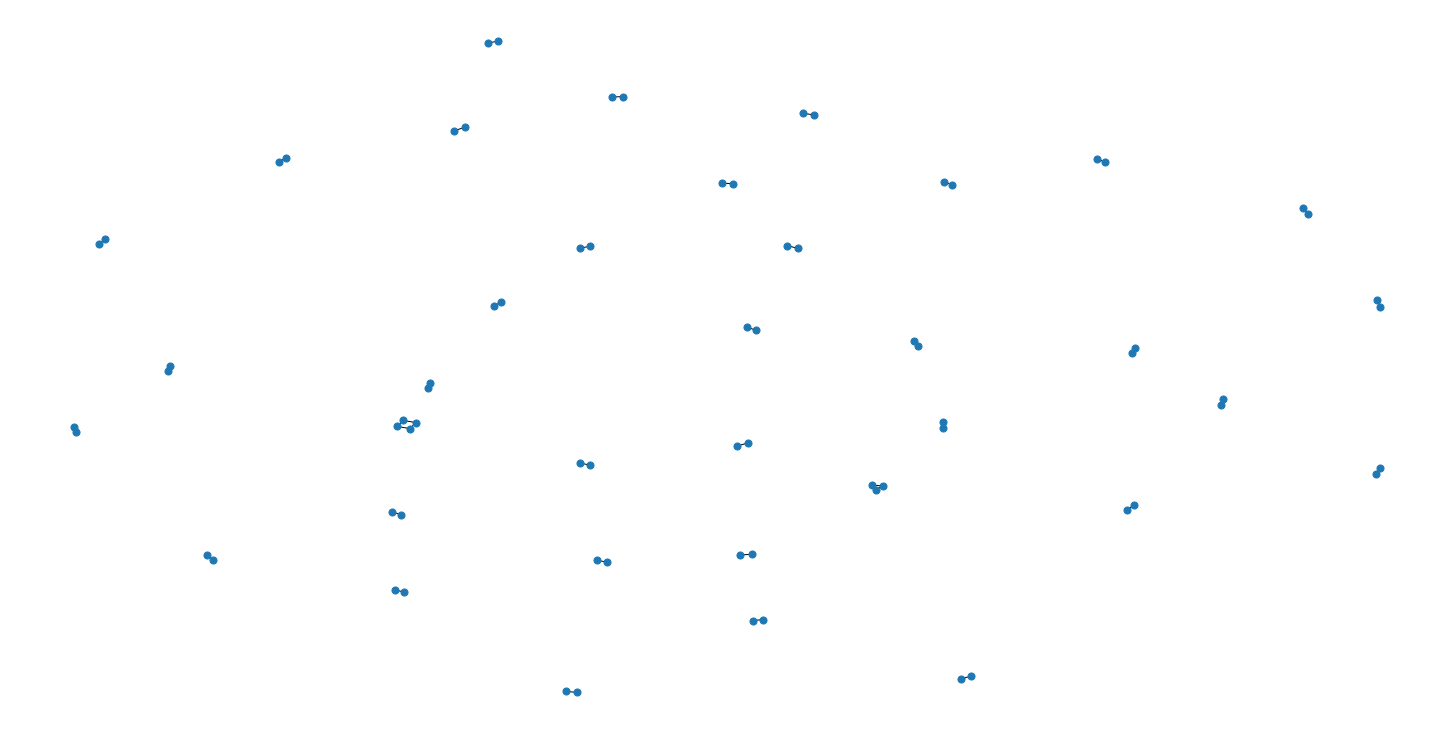

In [96]:
plt.figure(figsize = (20, 10))
nx.draw(G,node_size = 50, font_size = 20)  
plt.show()  

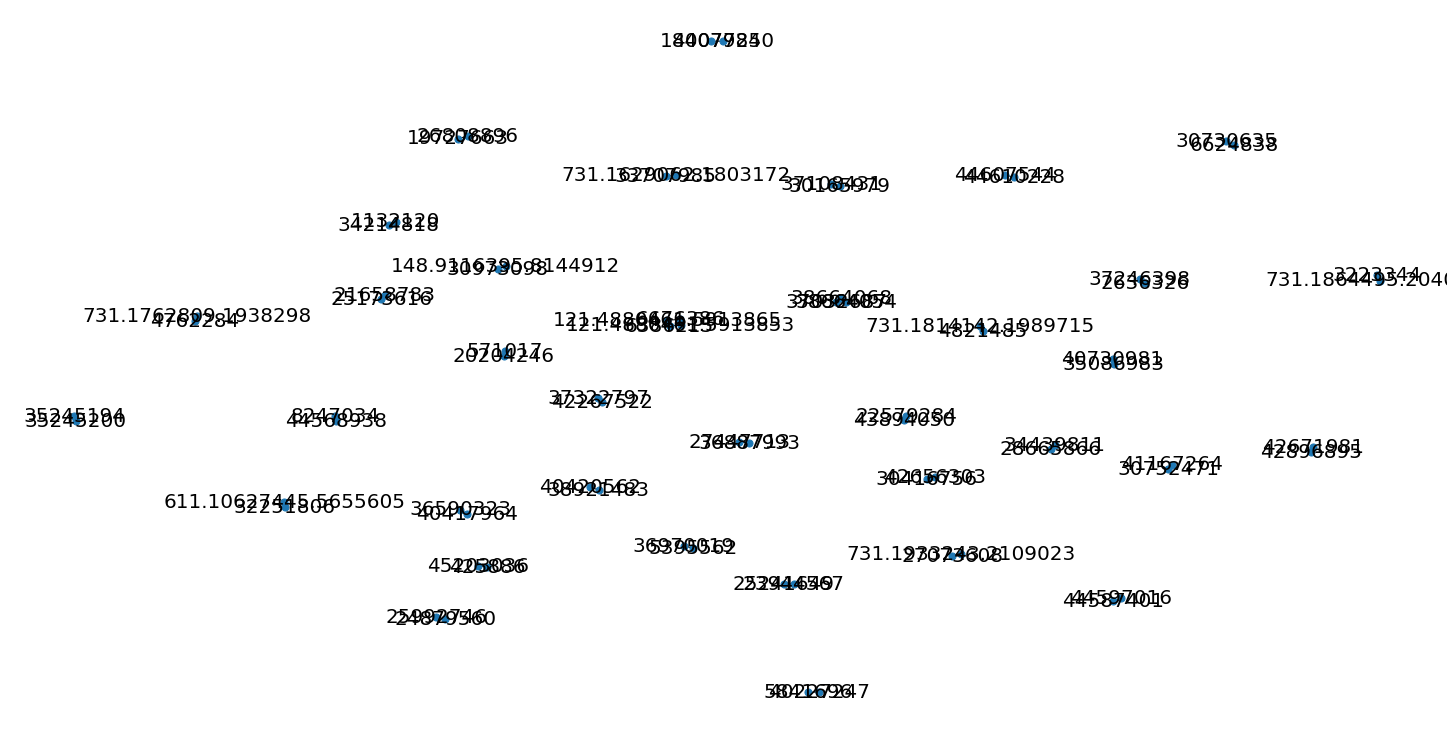

In [97]:
plt.figure(figsize = (20, 10))
nx.draw(G, with_labels = True, node_size = 50, font_size = 20)  
plt.show()  

In [120]:
for val in src:
    liste = list(nx.dfs_edges(G, source=val))
    length = len(liste)
    if length == 95:
        print(liste)
        break

[('39811145', '21808589'), ('21808589', '30083147'), ('30083147', '19486857'), ('19486857', '40129932'), ('40129932', '39456142'), ('40129932', '39407847'), ('40129932', '19627161'), ('40129932', '22561118'), ('30083147', '31080250'), ('31080250', '29477793'), ('29477793', '29497810'), ('29497810', '31034429'), ('31034429', '31551684'), ('31551684', '31132824'), ('31132824', '31082002'), ('31132824', '31085194'), ('31085194', '26432015'), ('26432015', '26625177'), ('26625177', '29148139'), ('29148139', '26511343'), ('26511343', '29504798'), ('29504798', '39982260'), ('39982260', '40277531'), ('40277531', '32054452'), ('32054452', '27150679'), ('27150679', '26729214'), ('27150679', '26650435'), ('27150679', '28948744'), ('40277531', '41039327'), ('41039327', '42398797'), ('42398797', '36833026'), ('36833026', '39829262'), ('39829262', '36222945'), ('36222945', '36743821'), ('36743821', '36220437'), ('36220437', '35665913'), ('35665913', '35660490'), ('35660490', '35560286'), ('35560286'

In [135]:
link[link.src_code == '29500854']

,src_site,src_code,src_url,src_img,comp_site,comp_code,comp_url,comp_img,%corresp
4812,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,26625177,https://www.airbnb.fr/rooms/26625177,9,53%
15166,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,26432015,https://www.airbnb.fr/rooms/26432015,10,59%
19811,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,26511343,https://www.airbnb.fr/rooms/26511343,9,53%
24629,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,39982260,https://www.airbnb.fr/rooms/39982260,15,88%
29891,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,31085194,https://www.airbnb.fr/rooms/31085194,14,82%
34723,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,29504798,https://www.airbnb.fr/rooms/29504798,15,88%
34724,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,31084691,https://www.airbnb.fr/rooms/31084691,10,59%
39387,Airbnb,29500854,https://www.airbnb.fr/rooms/29500854,17,Airbnb,29148139,https://www.airbnb.fr/rooms/29148139,15,88%


In [136]:
link[link.src_code == '40277531']

,src_site,src_code,src_url,src_img,comp_site,comp_code,comp_url,comp_img,%corresp
743,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,32054452,https://www.airbnb.fr/rooms/32054452,12,63%
1080,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,41039327,https://www.airbnb.fr/rooms/41039327,10,53%
6416,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,39981165,https://www.airbnb.fr/rooms/39981165,10,53%
6417,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,40078064,https://www.airbnb.fr/rooms/40078064,10,53%
11501,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,26729214,https://www.airbnb.fr/rooms/26729214,10,53%
16030,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,27150679,https://www.airbnb.fr/rooms/27150679,10,53%
20900,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,39982260,https://www.airbnb.fr/rooms/39982260,10,53%
26253,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,42400721,https://www.airbnb.fr/rooms/42400721,10,53%
30961,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,41023091,https://www.airbnb.fr/rooms/41023091,10,53%
31464,Airbnb,40277531,https://www.airbnb.fr/rooms/40277531,19,Airbnb,41018533,https://www.airbnb.fr/rooms/41018533,10,53%


In [122]:
import pandas as pd
import datetime
import time

def RetrieveFile(filename):
    df = pd.read_csv('../datasets/'+filename+'.csv',sep=";")
    return df

def ProcessLink():
    link = RetrieveFile('link')
    link = link.drop(['URL', 'Nb photos total','URL.1','Nb photos identiques'], axis=1)
    link = link.rename({"Site":"src_site","Code":"src_id","Site.1":"comp_site","Code.1":"comp_id","% correspondance":"corresp"},axis=1)
    link['corresp'] = link['corresp'].str[:-1].astype(int)
    return link

def VerifyMemo(memo, validationTable, src_id, comp_site, comp_id, corresp):
    if src_id not in memo:
        memo[src_id] = set()
    if comp_id not in memo[src_id]:
        memo[src_id].add(comp_id)
        validationTable = validationTable.append({'listing_id': src_id,'src_type':comp_site,'src_id':comp_id,'corresp':corresp}, ignore_index=True,sort=False)
    return validationTable

def CreateValidationTable(memo, validationTable, row):
    if row['src_site'] == 'Airbnb':
        validationTable = VerifyMemo(memo,validationTable,row['src_id'],row['comp_site'],row['comp_id'],row['corresp'])
    if row['comp_site'] == 'Airbnb':
        validationTable = VerifyMemo(memo,validationTable,row['comp_id'],row['src_site'],row['src_id'],row['corresp'])
    return validationTable

def RetrieveReviews(grouped, dictCom, row):
    table = dictCom[row['src_type']]
    try:
        foundReviews = table.loc[row['src_id']]
        if not isinstance(foundReviews, pd.DataFrame):
            foundReviews = pd.DataFrame([foundReviews])
            foundReviews.index.name = 'id'
        foundReviews = foundReviews.reset_index()
        foundReviews['corresp'] = row['corresp']
        return grouped.append(foundReviews, ignore_index=True,sort=False)
    except:
        return grouped
    
def GetValidationId():
    link = ProcessLink()
    memo = {}
    validationTable = pd.DataFrame(columns=['listing_id','src_type','src_id','corresp'])
    start_time = time.time()
    for index, row in link[:10].iterrows():
        validationTable = CreateValidationTable(memo,validationTable,row)
    print("--- %s seconds ---" % (time.time() - start_time))
    return validationTable

    
def ProcessReviews(date):
    reviews = pd.read_csv('../datasets/reviews/reviews-2020-09.csv',sep=",")
    reviews = reviews.drop(['id','reviewer_id','reviewer_name','comments'], axis=1)
    reviews = reviews.rename({"listing_id":"id","date":"date_com"},axis=1)
    reviews['date_com'] =  pd.to_datetime(reviews['date_com'], format='%Y-%m-%d')
    reviews['id'] = reviews['id'].astype(str)
    reviews['src'] = 'Airbnb'
    reviews = reviews.set_index('id')
    return reviews[reviews['date_com'] >= date]


def ProcessBooking(date):
    booking = RetrieveFile('booking')
    booking = booking.drop(['boo_url', 'contenu_commentaire','avatar','nationalite','score','room_info','dte_cre'], axis=1)
    booking = booking.rename({"b_id":"id","date_commentaire":"date_com"},axis=1)
    booking['date_com'] =  pd.to_datetime(booking['date_com'], format='%d/%m/%Y')
    booking['id'] = booking['id'].astype(str)
    booking['src'] = 'Booking'
    booking = booking.set_index('id')
    return booking[booking['date_com'] >= date]

def ProcessAbritel(date):
    abritel = RetrieveFile('abritel')
    abritel = abritel.drop(['abr_detailpageurl','com_arrivaldate', 'com_reviewlanguage','com_nickname','com_dte_cre','com_headline','com_body'], axis=1)
    abritel = abritel.rename({"com_listingid":"id","com_datepublished":"date_com"},axis=1)
    abritel['date_com'] =  pd.to_datetime(abritel['date_com'], format='%d/%m/%Y')
    abritel['id'] = abritel['id'].astype(str)
    abritel['src'] = 'Abritel'
    abritel = abritel.set_index('id')
    return abritel[abritel['date_com'] >= date]

In [121]:
ProcessAbritel(date)

,date_com,src
id,,
811.6672661.2116759,2020-09-04,Abritel
611.6731225.3907843,2020-09-16,Abritel
731.1929151.2104926,2020-10-12,Abritel
321.1533173.2091978,2020-08-23,Abritel
731.1935157.2110941,2020-10-01,Abritel
...,...,...
731.1865019.2040665,2020-10-09,Abritel
731.1865019.2040665,2020-09-30,Abritel
731.1884460.2060137,2020-10-30,Abritel


In [116]:
dictCom = {}
dictCom['Airbnb'] = ProcessReviews(date)
dictCom['Booking'] = ProcessBooking(date)
dictCom['Abritel'] = ProcessAbritel(date)

In [123]:
import datetime

date = datetime.datetime(2020, 8, 17)

validationTable = GetValidationId()
print(validationTable)
grouped = pd.DataFrame(columns=['id','date_com','corresp'])

start_time = time.time()
for index, row in validationTable.iterrows():
    grouped = RetrieveReviews(grouped,dictCom,row)
grouped = grouped.rename({"id":"listing_id","date_com":"date"})
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01799774169921875 seconds ---
  listing_id src_type    src_id corresp
0   23944567   Airbnb  25241649      92
1   25241649   Airbnb  23944567      92
2   24879560   Airbnb  25992746      67
3   25992746   Airbnb  24879560      67
4   34214818   Airbnb   1132120      92
5    1132120   Airbnb  34214818      92
--- 0.02199840545654297 seconds ---


In [ ]:
grouped

In [103]:
grouped[grouped['corresp']>70]

,id,date_com,corresp
0,34439811,2020-08-30,81
1,34439811,2020-09-10,81
2,34439811,2020-09-13,81
3,37108431,2020-08-27,100
4,41167264,2020-08-17,100
...,...,...,...
8791,40194653,2020-09-08,81
8792,40194653,2020-09-09,81
8793,40194653,2020-09-11,81
8794,40194653,2020-09-12,81


In [119]:
grouped[grouped['id'] == "731.1935157.2110941"]

,id,date_com,corresp,src
365,731.1935157.2110941,2020-10-01,76,Abritel
403,731.1935157.2110941,2020-10-01,76,Abritel
5106,731.1935157.2110941,2020-10-01,76,Abritel
5115,731.1935157.2110941,2020-10-01,76,Abritel
